In [3]:
import pandas as pd

In [4]:
raw_data = pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_edges_updated.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sneha\AppData\Local\Temp\ipykernel_28152\4272515025.py:1: SyntaxWarning: invalid escape sequence '\D'
  raw_data = pd.read_csv("D:\Data Science\Social Network and Text analysis\Coursework\dataset\s1_edges_updated.csv")


In [3]:
raw_data

,Season,Episode,Episode Title,Scene,Name,Speaker,House of Speaker,Listener,House of Listener,Interaction,Interaction type,Interaction Score,Interaction Result
0,Season 1,Episode 1,Winter is Coming,Scene 1,waymar royce,Waymar Royce,Night's Watch,Will,Night's Watch,What do you expect? They're savages. One lot s...,Conversation,1.0,NaN
1,Season 1,Episode 1,Winter is Coming,Scene 1,will,Will,Night's Watch,Waymar Royce,Night's Watch,I've never seen wildlings do a thing like this...,Conversation,1.0,NaN
2,Season 1,Episode 1,Winter is Coming,Scene 1,waymar royce,Waymar Royce,Night's Watch,Will,Night's Watch,How close did you get?,Conversation,1.0,NaN
3,Season 1,Episode 1,Winter is Coming,Scene 1,will,Will,Night's Watch,Gared,Night's Watch,Close as any man would.,Conversation,1.0,NaN
4,Season 1,Episode 1,Winter is Coming,Scene 1,gared,Gared,Night's Watch,Royce,Night's Watch,We should head back to the wall.,Conversation,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,Season 1,Episode 10,Fire and Blood,Scene 19,daenerys targaryen,Daenerys Targaryen,Targaryen,Daenerys Targaryen,Targaryen,ls that what you fear? You will be my khalasar...,Conversation,1.0,NaN
3176,Season 1,Episode 10,Fire and Blood,Scene 19,daenerys targaryen,Daenerys Targaryen,Targaryen,Mirri Maz Duur,Godswife,"Ser Jorah, bind this woman to the pyre. You sw...",Conversation,1.0,NaN
3177,Season 1,Episode 10,Fire and Blood,Scene 19,mirri maz duur,Mirri Maz Duur,Godswife,Daenerys Targaryen,Targaryen,You will not hear me scream.,Conversation,1.0,NaN
3178,Season 1,Episode 10,Fire and Blood,Scene 19,daenerys targaryen,Daenerys Targaryen,Targaryen,Jorah Mormont,Mormont,I will. But it is not your screams I want. Onl...,Conversation,1.0,NaN


In [5]:
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import coo_matrix
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
from nltk import punkt

In [7]:
text_data = raw_data[['Interaction']]

In [8]:
text_data

,Interaction
0,What do you expect? They're savages. One lot s...
1,I've never seen wildlings do a thing like this...
2,How close did you get?
3,Close as any man would.
4,We should head back to the wall.
...,...
3175,ls that what you fear? You will be my khalasar...
3176,"Ser Jorah, bind this woman to the pyre. You sw..."
3177,You will not hear me scream.
3178,I will. But it is not your screams I want. Onl...


In [9]:
nouns_df = raw_data[["Name"]]
nouns_df_unique = nouns_df.drop_duplicates(subset=['Name'])
nouns_df_unique

,Name
0,waymar royce
1,will
4,gared
5,royce
15,jon snow
...,...
3012,leo lefford
3013,addam marbrand
3083,sam pyp and grenn
3141,hot pie


In [10]:
noun_tkns = []
for index, row in nouns_df_unique.iterrows():
    #print(row.Name)
    tkn_list = word_tokenize(row.Name)
    noun_tkns.extend(tkn_list)
nouns_unique = list(set(noun_tkns))
print(nouns_unique)


['tribesmen', 'all', 'trant', 'tywin', 'watcher', 'rodrick', 'guard', 'jaime', 'hugh', 'greyjoy', 'eddard', 'robert', 'lefford', 'mirri', 'bird', 'barristan', 'outside', 'everyone', 'qotho', 'maid', 'illyrio', 'baratheon', 'alliser', 'maester', 'beric', 'meryn', 'night', 'hot', 'stevron', 'septa', 'khal', 'whent', 'soldier', 'baker', 'jon', 'boy', 'messenger', 'doreah', 'grand', 'lancel', 'and', 'marillion', 'rivers', 'merchant', 'grenn', 'irri', 'man', 'yoren', 'cassel', 'tyrion', 'Captain', 'scout', 'jory', 'sansa', 'greatjon', 'theon', 'ros', 'dondarrion', 'urchin', 'drogo', 'pycelle', 'jeor', 'of', 'renly', 'populace', 'leo', 'lysa', 'syrio', 'watch', 'osha', 'viserys', 'petyr', 'robb', 'mord', 'voices', 'ryger', 'mycah', 'daenerys', 'gared', 'pie', 'glover', 'joffrey', 'will', 'heddle', 'shae', 'walder', 'selmy', 'vale', 'mormont', 'vardis', 'snow', 'street', 'thorne', 'rakharo', 'bannermen', 'varys', 'umber', 'pyp', 'a', 'nights', 'rickard', 'ser', 'royce', 'clegane', 'arya', 'rh

In [11]:
for index, row in text_data.iterrows():
    sentence1 = str(row.Interaction).lower()
    if 'winter' in sentence1.split():
        print(sentence1)
    elif 'walkers' in sentence1.split():
        print(sentence1)

he won't be a boy forever. and winter is coming.
the white walkers have been gone for thousands of years.
he was talking madness. said the walkers slaughtered his friends.
maybe. direwolves south of the wall. talk of the walkers. my brother might be the next hand to the king. winter is coming.
winter is coming.
at someone, i mean. it's a strange thing, the first time you cut a man. you realize we're nothing but sacks of meat and blood and some bone to keep it all standing. let me thank you ahead of time for guarding us all from the perils beyond the wall... wildlings and white walkers and whatnot. we're grateful to have good, strong men like you protecting us.
winter may be coming, but i'm afraid the same cannot be said for my brother.
the north cannot be held... not by an outsider. it's too big and too wild. when the winter comes, the seven gods together couldn't save you and your royal army. a good king knows when to save his strength... and when to destroy his enemies.
winter is com

In [12]:
corpus = []
for index, row in text_data.iterrows():
    sentence = str(row.Interaction).lower().strip()
    corpus.append(sentence)
print(corpus)

["what do you expect? they're savages. one lot steals a goat from another lot and before you know it, they're ripping each other to pieces.", "i've never seen wildlings do a thing like this. i've never seen a thing like this, not ever in my life.", 'how close did you get?', 'close as any man would.', 'we should head back to the wall.', 'do the dead frighten you?', "our orders were to track the wildlings. we tracked them. they won't trouble us no more.", "you don't think he'll ask us how they died? get back on your horse.", 'whatever did it to them could do it to us. they even killed the children.', "it's a good thing we're not children. you want to run away south, run away. of course, they will behead you as a deserter … if i don't catch you first. get back on your horse. i won't say it again.", 'your dead men seem to have moved camp.', 'they were here.', 'see where they went.', 'what is it?', "it's …", "go on. father's watching.", 'and your mother.', 'fine work, as always. well done.'

In [ ]:
# N- grams
night_king_list = ['winter is coming','winter is here','winter is coming!','winter','winter is']
vectorizer1 = CountVectorizer(analyzer='word',ngram_range=(1,1))
X1 = vectorizer1.fit_transform(corpus)
feature_names = vectorizer1.get_feature_names_out()
for ngram in night_king_list:
    if ngram in feature_names:
        index = list(feature_names).index(ngram)
        print(feature_names[index])
        count = X1[:, index].sum()
        print(f"Count of '{ngram}': {count}")

winter
Count of 'winter': 16


In [68]:

stopwords = set(nltk.corpus.stopwords.words('english'))
processed_tokens_list = []
for text in corpus: 
    text = text.lower()
    text = re.sub(r'\d+','', text) # Removing digits
    translator = str.maketrans('','',string.punctuation)
    text = text.translate(translator) # remove punctuation
    text = text.strip()
    tokens = word_tokenize(text)
    for tkn in tokens:
        processed_tokens_list.append(tkn)
#print(len(processed_tokens_list))
    
filtered_tokens = [w for w in processed_tokens_list if w not in stopwords]
unique_filtered_tokens = (filtered_tokens)
print(len(unique_filtered_tokens))
unique_filtered_tokens


18928


['expect',
 'theyre',
 'savages',
 'one',
 'lot',
 'steals',
 'goat',
 'another',
 'lot',
 'know',
 'theyre',
 'ripping',
 'pieces',
 'ive',
 'never',
 'seen',
 'wildlings',
 'thing',
 'like',
 'ive',
 'never',
 'seen',
 'thing',
 'like',
 'ever',
 'life',
 'close',
 'get',
 'close',
 'man',
 'would',
 'head',
 'back',
 'wall',
 'dead',
 'frighten',
 'orders',
 'track',
 'wildlings',
 'tracked',
 'wont',
 'trouble',
 'us',
 'dont',
 'think',
 'hell',
 'ask',
 'us',
 'died',
 'get',
 'back',
 'horse',
 'whatever',
 'could',
 'us',
 'even',
 'killed',
 'children',
 'good',
 'thing',
 'children',
 'want',
 'run',
 'away',
 'south',
 'run',
 'away',
 'course',
 'behead',
 'deserter',
 '…',
 'dont',
 'catch',
 'first',
 'get',
 'back',
 'horse',
 'wont',
 'say',
 'dead',
 'men',
 'seem',
 'moved',
 'camp',
 'see',
 'went',
 '…',
 'go',
 'fathers',
 'watching',
 'mother',
 'fine',
 'work',
 'always',
 'well',
 'done',
 'thank',
 'love',
 'detail',
 'youve',
 'managed',
 'get',
 'corners',
 '

In [69]:
unique_words = [w for w in unique_filtered_tokens if w not in nouns_unique] 
print(len(unique_words))

17387


In [51]:
stemmed = []
porter = PorterStemmer()
for word in unique_words:
    stemmed.append(porter.stem(word))


In [52]:
lemmatized = []
lemmatizer = WordNetLemmatizer()
for word in unique_words:
    lemmatized.append(lemmatizer.lemmatize(word))

In [57]:
print(stemmed)
print(len(stemmed))
print(lemmatized)
print(len(lemmatized))

['stab', 'aunt', 'cowardli', '“', 'scare', 'knee', 'carri', 'beggar', 'twist', 'blueey', 'dani', 'sworn', 'hound', 'steffon', 'introduc', 'carri', 'blacksmith', 'today', 'ranger', 'confess', 'worship', 'best', 'volunt', 'none', 'come', 'consid', 'outnumb', 'justic', 'ampute', 'understand', 'skin', 'essenc', 'rider', 'requir', 'milkmaid', 'post', 'brown', 'deal', 'navig', 'pleasant', 'ride', 'whisper', 'awar', 'plead', 'strength', 'brothel', 'bravo', 'varyss', 'bore', 'sale', 'word', 'lmpossibl', 'lone', 'tramp', 'anywher', 'dancer', 'raven', 'hear', 'spider', 'braavosi', 'learn', 'know', 'took', 'battleax', 'ridden', 'breastplat', 'twin', 'drink', 'comfort', 'freak', 'scar', 'coupl', 'becca', 'primp', 'place', 'decid', 'sailor', 'pledg', 'rat', 'famou', 'surnam', 'opinion', 'clearli', 'intrepid', 'silenc', 'whi', 'natur', 'rebel', 'howl', 'lead', 'burden', 'movement', 'touch', 'midst', 'harrenh', 'fill', 'oaf', 'war', 'monstrous', 'horselordo', 'demand', 'power', 'fell', 'pillar', 'poc

In [ ]:
fd = nltk.FreqDist(lemmatized)
fd

FreqDist({'lady': 3, 'enemy': 3, 'woman': 3, 'wife': 3, 'wolf': 3, 'knee': 2, 'ranger': 2, 'come': 2, 'rider': 2, 'brothel': 2, ...})

: 

In [ ]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(text_data['Interaction']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names_out()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sneha\AppData\Local\Temp\ipykernel_8228\2741412329.py:2: SyntaxWarning: invalid escape sequence '\w'
  vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')


In [66]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [67]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)
model.fit(tf)
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,.,832.9,.,493.5,the,737.8,.,718.0,?,804.5,.,435.0,you,491.9,'t,402.8,!,354.1,.,632.8
1,'s,319.3,",",335.9,.,544.9,i,629.6,what,244.0,",",392.1,?,230.0,.,338.1,no,55.9,you,574.7
2,it,298.0,l,286.4,of,317.7,the,419.8,you,202.2,the,252.6,.,196.4,don,170.1,-,50.4,to,438.8
3,a,208.7,my,195.4,his,218.7,a,217.9,do,141.8,your,208.6,are,146.6,i,154.8,stop,31.1,me,221.9
4,she,139.2,a,165.8,he,215.6,to,213.3,did,103.8,my,191.4,",",124.4,",",103.8,the,28.5,i,155.9
5,",",135.8,you,127.4,and,180.4,",",184.5,is,98.6,is,155.9,and,117.9,you,96.0,",",27.0,'re,140.5
6,that,119.8,him,59.1,king,178.8,and,168.7,why,88.1,lord,154.0,your,111.0,can,87.9,please,23.8,",",139.9
7,he,114.3,yes,56.1,a,131.0,of,132.7,where,61.0,in,110.5,with,69.7,…,51.2,on,20.0,be,138.2
8,her,108.6,and,53.6,",",128.3,have,114.1,it,59.4,and,81.7,tell,67.5,know,49.6,khaleesi,18.6,'ll,120.0
9,no,103.4,well,53.0,'s,122.0,'m,112.9,that,59.4,of,70.9,the,57.3,we,46.4,sword,17.5,your,92.0


In [56]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# ALready done up
#vectorizer1 = CountVectorizer(analyzer='word',ngram_range=(3,3))
#X1 = vectorizer1.fit_transform(corpus)
# vectorizer1.get_feature_names_out()
#X1.toarray()

In [55]:
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(corpus)
# vectorizer2.get_feature_names_out()
#X2.toarray()
features = vectorizer2.get_feature_names_out()
A = coo_matrix(X2[2])
vector = [(features[j], v) for i,j,v in zip(A.row, A.col, A.data)]
print(sorted(vector, key = lambda x : x[1]))

[('you', 0.20121931086066963), ('how', 0.42110859313299864), ('did', 0.4292841162896211), ('get', 0.46031142872012165), ('close', 0.6212945177750914)]


In [73]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 682.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [94]:
cmt_words = ''
remove_list = ['lady','wife','lord','say','woman','want']
for val in lemmatized:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        #if tokens[i] not in remove_list:
        tokens[i] = tokens[i].lower()
    for tkn in tokens:
        if tkn in  remove_list:
            tokens.remove(tkn)
    cmt_words += " ".join(tokens)+" "

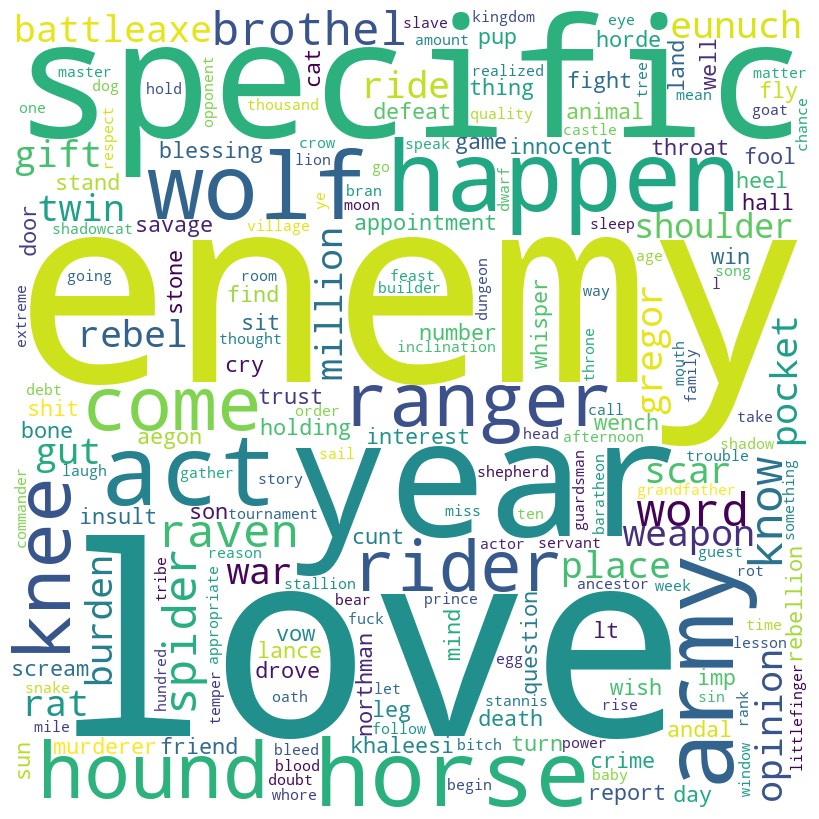

In [95]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(cmt_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
porter = PorterStemmer()
stemmed = []
for sent in sent_tokenize(text):
    for word in word_tokenize(sent):
        stemmed.append(porter.stem(word))
#return " ".join(stemmed)

In [ ]:
lemmatizer = WordNetLemmatizer()
Stemmed1 = []
for sent in sent_tokenize(text):
    for word in word_tokenize(sent):
        Stemmed1.append(lemmatizer.lemmatize(word))


In [ ]:
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()
